In [1]:
#import necessary modules

import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
# Step 1: Data acquisition

df: pd.DataFrame = pd.read_excel('Data Take Home Assignment 1 Exercise A.xlsx')
df = df.iloc[142:162]
df

,X,Y
142,23.77,445.72
143,14.43,466.58
144,28.25,436.99
145,12.26,470.87
146,14.55,457.77
147,24.57,448.15
148,10.25,476.03
149,21.96,442.87
150,9.82,477.93
151,18.58,459.06


In [3]:
# Step 2: Data transformation using Min-Max normalization
# info: https://www.geeksforgeeks.org/data-normalization-in-data-mining/

def normalize(df):
    for c in df.columns: 
        df[c] = (df[c] - df[c].min()) / (df[c].max() - df[c].min())
    return df
df = normalize(df)
df

,X,Y
142,0.727098,0.224976
143,0.279137,0.726901
144,0.941966,0.014918
145,0.175060,0.830125
146,0.284892,0.514918
147,0.765468,0.283446
148,0.078657,0.954283
149,0.640288,0.156400
150,0.058034,1.000000
151,0.478177,0.545958


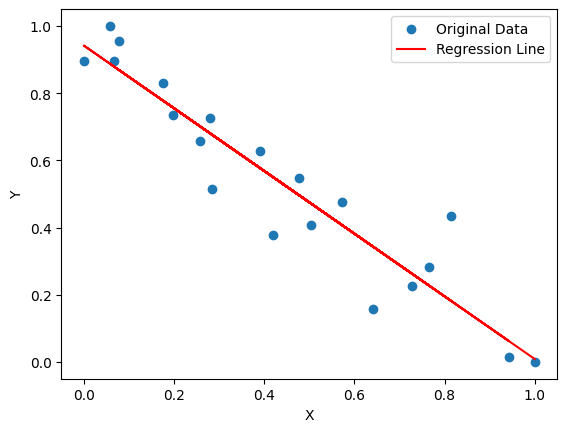

In [4]:
# Step 3: Least Squares

def least_squares(x, y):
    """Given the X and Y parameters of a data set, will return a regression line.
    The regression line is calculated with the formula `Y = m*x + b` where:
        - `Y` is the the predicted parameters,
        - `m` is the slope coefficient,
        - `b` is the y-intercept, 
        - `x` is the input data.
    
    Args:
        - `x`: original x data
        - `y`: original y data
        
    Returns:
        - `y_prediction`: regression line
    """
    n = len(x)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)
    x_squared_sum = np.sum(x**2)

    m = (n * xy_sum - x_sum*y_sum) / (n*x_squared_sum - x_sum**2) # slope coefficient
    b = (y_sum - m*x_sum) / n # y-intercept

    y_prediction = m*x + b 
    return y_prediction

y_prediction = least_squares(df.X, df.Y)

# plot original data against regression line
plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, y_prediction, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
# Step 4: Cost Function using Mean Squared Error (MSE)

def cost_function(theta, x, y):
    """Implementation of the Mean Squared Error (MSE) cost function.
    
    Args:
        - theta: model parameters
        - `x`: x data
        - `y`: y data
        
    Returns:
        - MSE
    """

    for i in range(len(x)):
        h_xi = theta[0] + theta[1] * x[i]
        cost = (h_xi - y[i])**2
    cost *= 1/(2*len(x))
    return cost

def get_gradient(theta, x, y):
    """Gradient for given data.
    
    Args:
        - theta: model parameters
        - `x`: x data
        - `y`: y data

    Returns:
        - theta_gradient: partial derivates with respect to theta
    """
    theta_gradient = np.zeros(2)
    for i in range(len(x)):
        theta_gradient[0] += (theta[1]*x[i] + theta[0])- y[i]
        theta_gradient[1] += ((theta[1]*x[i] + theta[0])- y[i])*x[i]

    theta_gradient = 1/len(x)*theta_gradient
    return theta_gradient
    
theta = np.zeros(2,)
theta[0] = np.random.random()
theta[1] = np.random.random()
cost = cost_function(theta, df['X'].values, df['Y'].values)
theta_gradient = get_gradient(theta, df['X'].values, df['Y'].values)
print(cost, theta_gradient)

0.04018325736005518 [0.35988247 0.29682026]


initial a: 0.9997943678141531
initial b: 0.10232014171454096
gradient_a: 0.5061023139215985
gradient_b: 0.3111291231986886
a after iter 1: 0.9491841364219933
b after iter 1: 0.0712072293946721


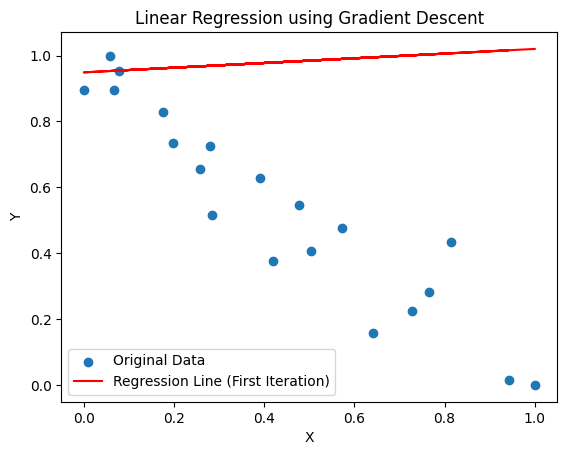

In [6]:
# Step 5 Gradient Descent first iteration

theta = np.zeros(2)
theta[0] = np.random.random()
theta[1] = np.random.random()
print("initial a:", theta[0])
print("initial b:", theta[1])
learning_rate = 0.1
iterations = 1000
costs = []

cost = cost_function(theta, np.array(df.X), np.array(df.Y))
costs.append(cost)
y_prediction = theta[1]*df.X + theta[0]

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta[0] -= learning_rate * theta_gradient[0]
theta[1] -= learning_rate * theta_gradient[1]

print("gradient_a:", theta_gradient[0])
print("gradient_b:", theta_gradient[1])
print("a after iter 1:", theta[0])
print("b after iter 1:", theta[1])

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[1]*df.X + theta[0], color='red', label='Regression Line (First Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

gradient_a: 0.2806412267461577
gradient_b: 0.4420322039143204
a after iter 1: 0.04314310672005632
b after iter 1: 0.9049809160305613


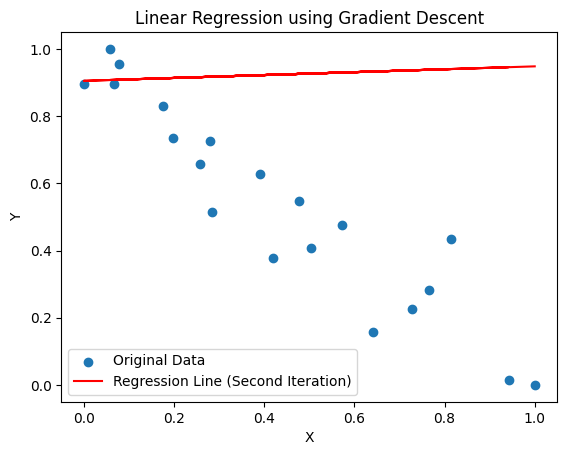

In [7]:
# Step 6 Gradient Descent - second iteration

y_prediction = theta[1]*df.X + theta[0]

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta[0] -= learning_rate * theta_gradient[0]
theta[1] -= learning_rate * theta_gradient[1]

print("gradient_a:", theta_gradient[1])
print("gradient_b:", theta_gradient[0])
print("a after iter 1:", theta[1])
print("b after iter 1:", theta[0])

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[1]*df.X + theta[0], color='red', label='Regression Line (Second Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

gradient_a: 0.25376715043220666
gradient_b: 0.3856880537135342
a after iter 1: 0.017766391676835653
b after iter 1: 0.8664121106592079


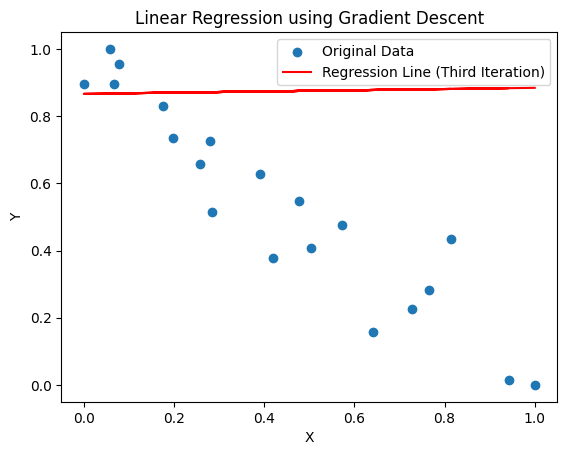

In [8]:
# Step 7 Gradient Descent - third iteration

y_prediction = theta[1]*df.X + theta[0]

theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

theta[0] -= learning_rate * theta_gradient[0]
theta[1] -= learning_rate * theta_gradient[1]

print("gradient_a:", theta_gradient[1])
print("gradient_b:", theta_gradient[0])
print("a after iter 1:", theta[1])
print("b after iter 1:", theta[0])

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[1]*df.X + theta[0], color='red', label='Regression Line (Third Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

Converged at step 697 3.036750036415188e-06 1e-08
gradient_a: 0.0003392410351729472
gradient_b: -0.0001585002328976487
a after iter 1000: -0.928430409818621
b after iter 1000: 0.9394517528155796
last cost: 3.046718235101726e-06


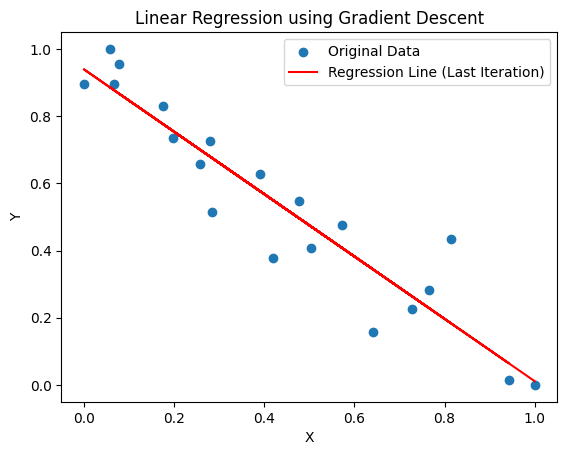

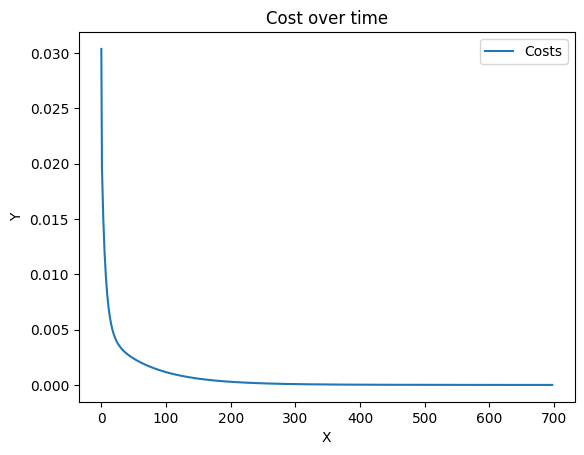

In [9]:
# Step 8 Gradient Descent - final iteration

cost_acceptance = 1e-8
for i in range(iterations):
    cost = cost_function(theta, np.array(df.X), np.array(df.Y))

    # end descent if optimality reached
    if abs(costs[-1] - cost) < cost_acceptance:
        print("Converged at step", i, cost, cost_acceptance)
        break
    
    costs.append(cost)

    # Calculate the gradients with respect to m and b
    theta_gradient = get_gradient(theta, np.array(df.X), np.array(df.Y))

    # Update the model parameters
    theta[0] -= learning_rate * theta_gradient[0]
    theta[1] -= learning_rate * theta_gradient[1]

print("gradient_a:", theta_gradient[1])
print("gradient_b:", theta_gradient[0])
print(f"a after iter {iterations}:", theta[1])
print(f"b after iter {iterations}:", theta[0])
print('last cost:', costs[-1])

plt.scatter(df.X, df.Y, label='Original Data')
plt.plot(df.X, theta[1]*df.X + theta[0], color='red', label='Regression Line (Last Iteration)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

plt.plot(costs, label='Costs')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Cost over time')
plt.show()

In [10]:
# A.II Polynimial Regression